# 1. Import Library

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

# 2. Data Loading & Splitting

In [3]:
# Load dataset
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.34,37.55,25.0,4470.0,518.0,1507.0,504.0,13.3913,500001.0,NEAR OCEAN
1,-120.38,37.97,47.0,1060.0,219.0,496.0,205.0,2.5781,104800.0,INLAND
2,-118.36,34.09,36.0,1390.0,458.0,874.0,468.0,2.5812,200000.0,<1H OCEAN
3,-117.99,33.81,46.0,38.0,8.0,66.0,14.0,4.1667,162500.0,<1H OCEAN
4,-122.57,37.97,47.0,5416.0,1115.0,2177.0,1027.0,3.5055,382100.0,NEAR BAY


In [5]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 20640
Number of columns: 10


In [7]:
# Get testing data
df_test = df.iloc[:R//5, :]
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.34,37.55,25.0,4470.0,518.0,1507.0,504.0,13.3913,500001.0,NEAR OCEAN
1,-120.38,37.97,47.0,1060.0,219.0,496.0,205.0,2.5781,104800.0,INLAND
2,-118.36,34.09,36.0,1390.0,458.0,874.0,468.0,2.5812,200000.0,<1H OCEAN
3,-117.99,33.81,46.0,38.0,8.0,66.0,14.0,4.1667,162500.0,<1H OCEAN
4,-122.57,37.97,47.0,5416.0,1115.0,2177.0,1027.0,3.5055,382100.0,NEAR BAY


In [8]:
# Display the shape
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 4128
Number of columns: 10


In [9]:
# Get training data
df_train = df.iloc[R//5:, :]
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4128,-122.47,37.79,52.0,2844.0,623.0,1380.0,596.0,4.7500,500001.0,NEAR BAY
4129,-121.80,36.69,12.0,3877.0,914.0,2274.0,858.0,3.4239,194800.0,<1H OCEAN
4130,-122.27,37.84,52.0,2224.0,437.0,1006.0,422.0,2.6000,132600.0,NEAR BAY
4131,-118.27,33.99,35.0,932.0,294.0,1153.0,282.0,1.4886,100000.0,<1H OCEAN
4132,-118.39,34.22,35.0,1790.0,334.0,1277.0,345.0,5.0818,186800.0,<1H OCEAN


In [10]:
# Display the shape
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 16512
Number of columns: 10


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [11]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 16512
Number of columns: 10


In [12]:
# # Drop unnecessary columns
# df_train = df_train.drop(['Unnamed: 0'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [13]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [14]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 4128 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16342 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [15]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16342 entries, 0 to 16341
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16342 non-null  float64
 1   latitude            16342 non-null  float64
 2   housing_median_age  16342 non-null  float64
 3   total_rooms         16342 non-null  float64
 4   total_bedrooms      16342 non-null  float64
 5   population          16342 non-null  float64
 6   households          16342 non-null  float64
 7   median_income       16342 non-null  float64
 8   median_house_value  16342 non-null  float64
 9   ocean_proximity     16342 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [16]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


In [17]:
# # Rename columns
# headers = ["carat", "cut", "color",
#            "clarity", "depth (%)", "table", "price", 
#            "length (mm)", "width (mm)", "depth (mm)"]
# df_train.columns = headers
# df_train.columns

In [18]:
# Show unique values on each X's columns
X = df_train.drop(['median_house_value'], axis=1)

for col in X.columns:
    print(X[col].value_counts())

longitude
-118.31    134
-118.30    129
-118.29    125
-118.27    112
-118.35    110
          ... 
-123.91      1
-123.17      1
-116.06      1
-115.98      1
-116.82      1
Name: count, Length: 822, dtype: int64
latitude
34.08    190
34.06    189
34.05    177
34.07    175
34.04    174
        ... 
40.30      1
33.27      1
39.69      1
41.13      1
40.91      1
Name: count, Length: 845, dtype: int64
housing_median_age
52.0    991
36.0    684
35.0    652
16.0    616
17.0    559
34.0    555
26.0    505
33.0    491
18.0    451
32.0    439
25.0    421
37.0    420
19.0    396
15.0    393
27.0    388
30.0    385
28.0    376
24.0    375
20.0    373
23.0    361
29.0    358
31.0    355
21.0    350
14.0    327
22.0    320
38.0    317
39.0    301
42.0    290
43.0    289
44.0    286
13.0    244
40.0    238
45.0    225
41.0    223
10.0    204
11.0    200
46.0    200
5.0     197
12.0    187
8.0     167
9.0     167
4.0     159
47.0    153
48.0    141
7.0     134
6.0     126
50.0    111
49.0    109


In [19]:
# # Drop poor features (to avoid overfitting)
# df_train = df_train.drop(['VendorID'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['payment_type'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [20]:
# # Remove X's invalid row
# df_train = df_train[df_train["Bare Nuclei"] != "?"]

# X = df_train.drop(['Class'], axis=1)

# for col in X.columns:
#     print(X[col].value_counts())

In [21]:
# Check invalid datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16342 entries, 0 to 16341
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16342 non-null  float64
 1   latitude            16342 non-null  float64
 2   housing_median_age  16342 non-null  float64
 3   total_rooms         16342 non-null  float64
 4   total_bedrooms      16342 non-null  float64
 5   population          16342 non-null  float64
 6   households          16342 non-null  float64
 7   median_income       16342 non-null  float64
 8   median_house_value  16342 non-null  float64
 9   ocean_proximity     16342 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [22]:
# # Change the data type of X's invalid columns
# df_train["Target class"] = df_train["Target class"].astype("int64")
# df_train.info()

In [23]:
# Show unique values on y's column
y = df_train['median_house_value']

print(f"Number of rows: {y.shape[0]}\n")

print(y.value_counts())

Number of rows: 16342

median_house_value
500001.0    769
137500.0     99
162500.0     85
112500.0     82
187500.0     76
           ... 
317800.0      1
416900.0      1
46500.0       1
440100.0      1
445700.0      1
Name: count, Length: 3652, dtype: int64


In [24]:
# # Remove y's invalid row
# df_train = df_train[df_train["Bare Nuclei"] != "?"]

# y = df_train['Class']

# for col in X.columns:
#     print(X[col].value_counts())

In [25]:
# # Change the data type of y's invalid column
# df_train["Bare Nuclei"] = df_train["Bare Nuclei"].astype("int64")
# df_train.info()

In [26]:
# Show categorical columns
categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

print("Categorical columns:")
print(sorted(categorical_cols))

Categorical columns:
['ocean_proximity']


In [27]:
# Show unique values in categorical columns
unique_values = []

for col in categorical_cols:
    unique_value = [col]
    unique_value.append(", ".join(df_train[col].unique()))
    unique_values.append(unique_value)

pd.DataFrame(unique_values, columns=["col", "unique values"])

,col,unique values
0,ocean_proximity,"NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND"


In [28]:
# Encode nominal data
df_train = pd.get_dummies(df_train, columns=['ocean_proximity'], drop_first=True)
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.47,37.79,52.0,2844.0,623.0,1380.0,596.0,4.7500,500001.0,False,False,True,False
1,-121.80,36.69,12.0,3877.0,914.0,2274.0,858.0,3.4239,194800.0,False,False,False,False
2,-122.27,37.84,52.0,2224.0,437.0,1006.0,422.0,2.6000,132600.0,False,False,True,False
3,-118.27,33.99,35.0,932.0,294.0,1153.0,282.0,1.4886,100000.0,False,False,False,False
4,-118.39,34.22,35.0,1790.0,334.0,1277.0,345.0,5.0818,186800.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16337,-118.46,33.97,19.0,2461.0,521.0,777.0,447.0,10.0000,500001.0,False,False,False,False
16338,-118.03,33.70,15.0,3244.0,421.0,1259.0,413.0,7.7854,395300.0,False,False,False,False
16339,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,150700.0,False,False,False,False
16340,-118.29,33.93,43.0,2021.0,379.0,1051.0,352.0,3.3836,129900.0,False,False,False,False


In [29]:
# # Encode ordinal data

# enc_maps = {
#     "cut" : [{'col': "cut", 'mapping': {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}}],
#     "color" : [{'col': "color", 'mapping': {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J": 6}}],
#     "clarity" : [{'col': "clarity", 'mapping': {"FL": 0, "IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "l1": 8, "l2": 9, "l3": 10}}],
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)


# df_train

<Axes: >

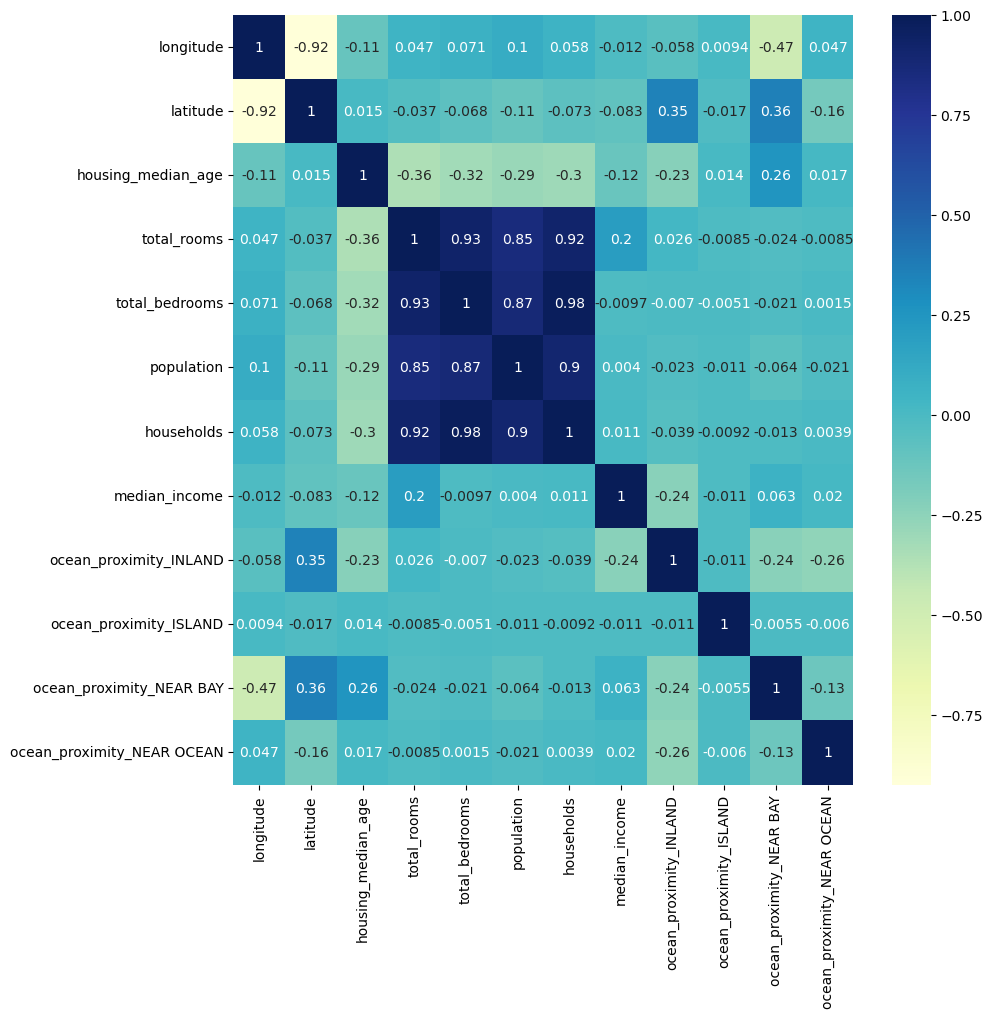

In [30]:
# Displaying heatmap
X = df_train.drop(['median_house_value'], axis=1)

plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

In [31]:
# # Drop correlated features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

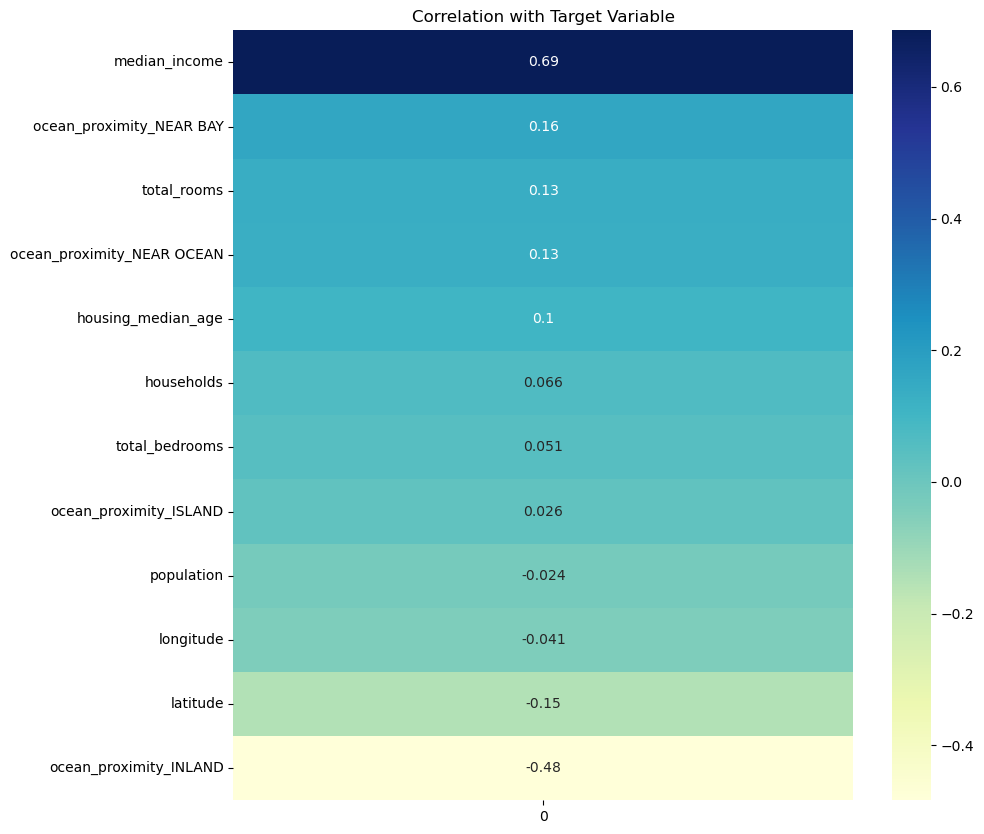

In [32]:
# Create a correlation matrix with target variable
X = df_train.drop(['median_house_value'], axis=1)
y = df_train['median_house_value']

corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [33]:
# # Drop unimportant features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

Do it when the data is sufficient

In [34]:
# Show all numerical columns
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)
numerical_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [35]:
# Detect outliers
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

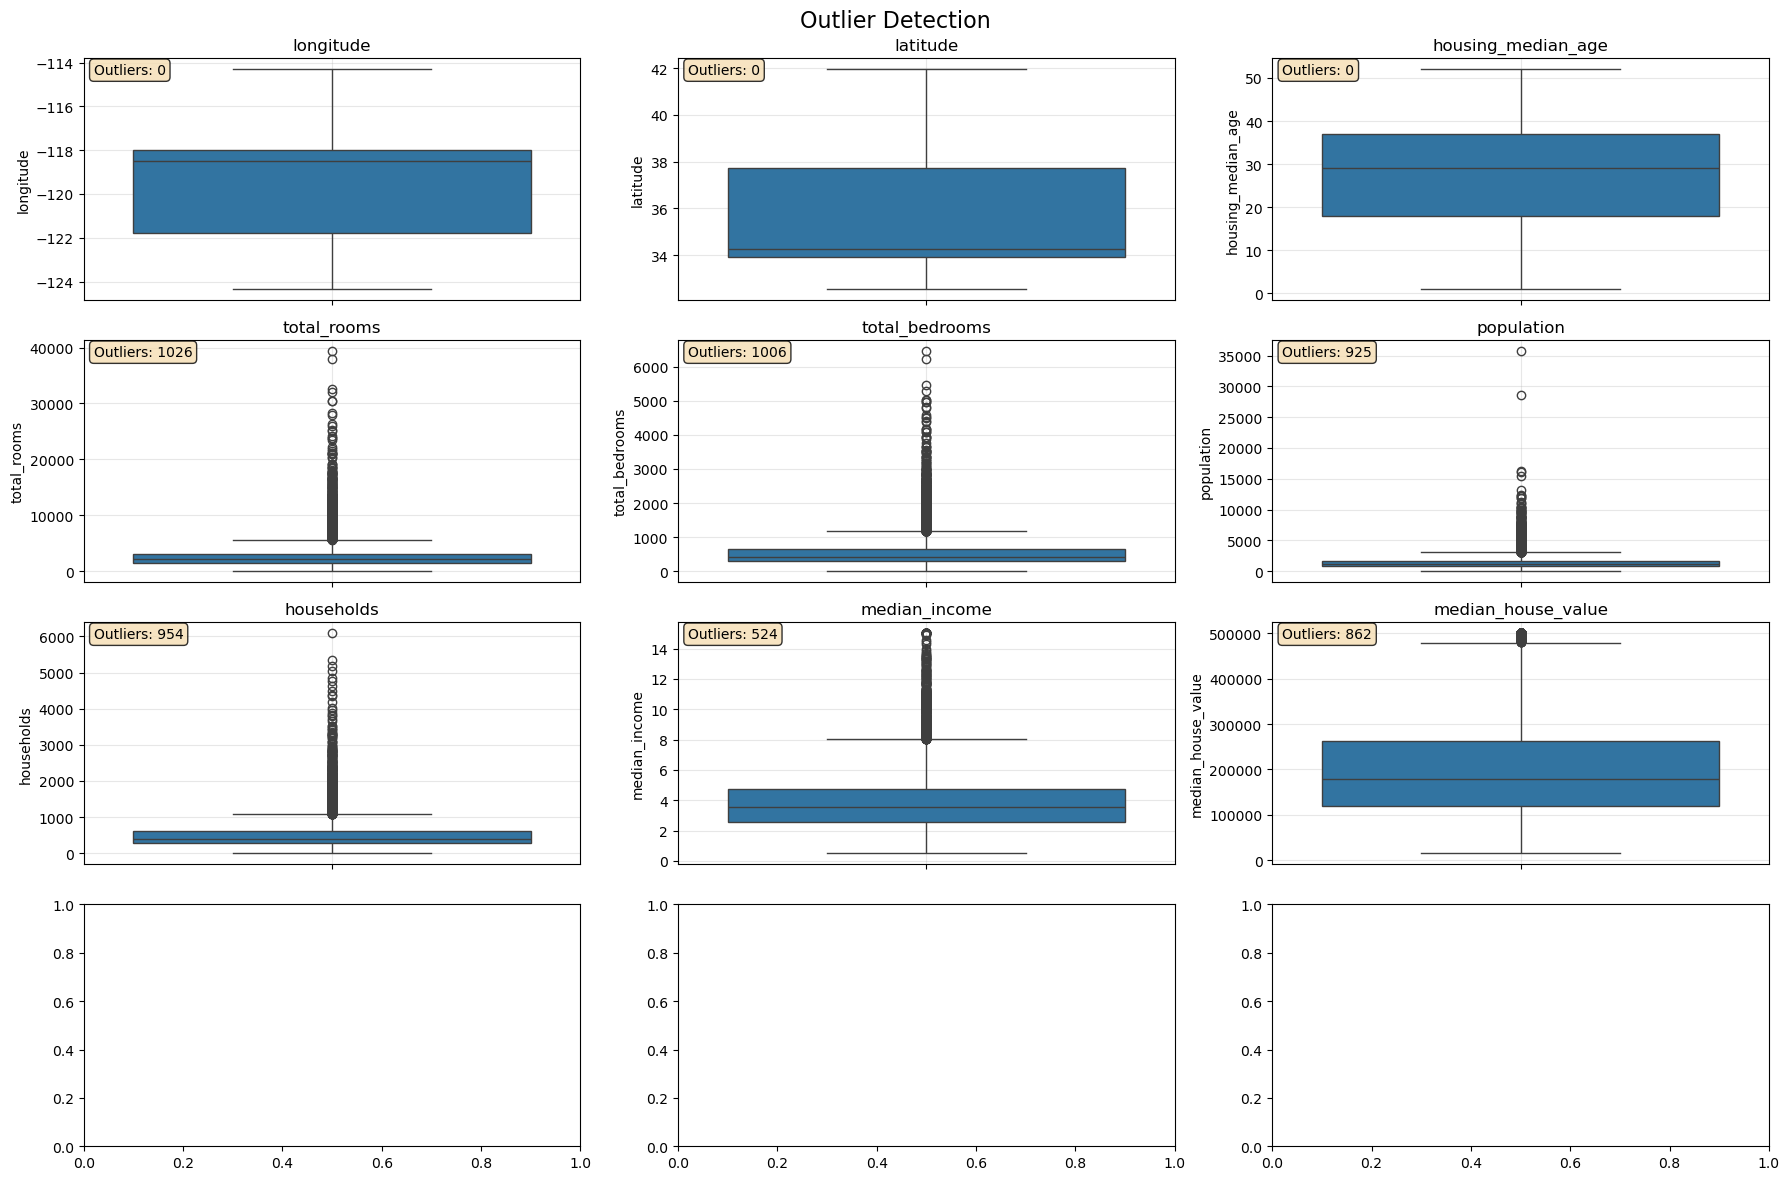

In [36]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [37]:
# Remove same outliers

print(f"Number of rows: {df_train.shape[0]}")

print("\nRemoving outliers...\n")

outlier_condition = True
for col in numerical_columns:
    # A row is an outlier if it's OUTSIDE the bounds (< lower OR > upper)
    outlier_condition = outlier_condition & ((df_train[col] < lower_bounds[col]) | (df_train[col] > upper_bounds[col]))

# Remove rows that are outliers in ALL columns
df_train = df_train[~outlier_condition]
df_train = df_train.reset_index(drop=True)

print(f"Number of rows: {df_train.shape[0]}")

Number of rows: 16342

Removing outliers...

Number of rows: 16342


In [38]:
# # Remove individual outliers (only if the dataset is big enough)

# print(f"Number of rows: {df_train.shape[0]}")

# print("\nRemoving outliers...\n")

# for i, col in enumerate(numerical_columns):
    
#     df_train = df_train[df_train[col] >= lower_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
#     df_train = df_train[df_train[col] <= upper_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
    
# print(f"Number of rows: {df_train.shape[0]}")

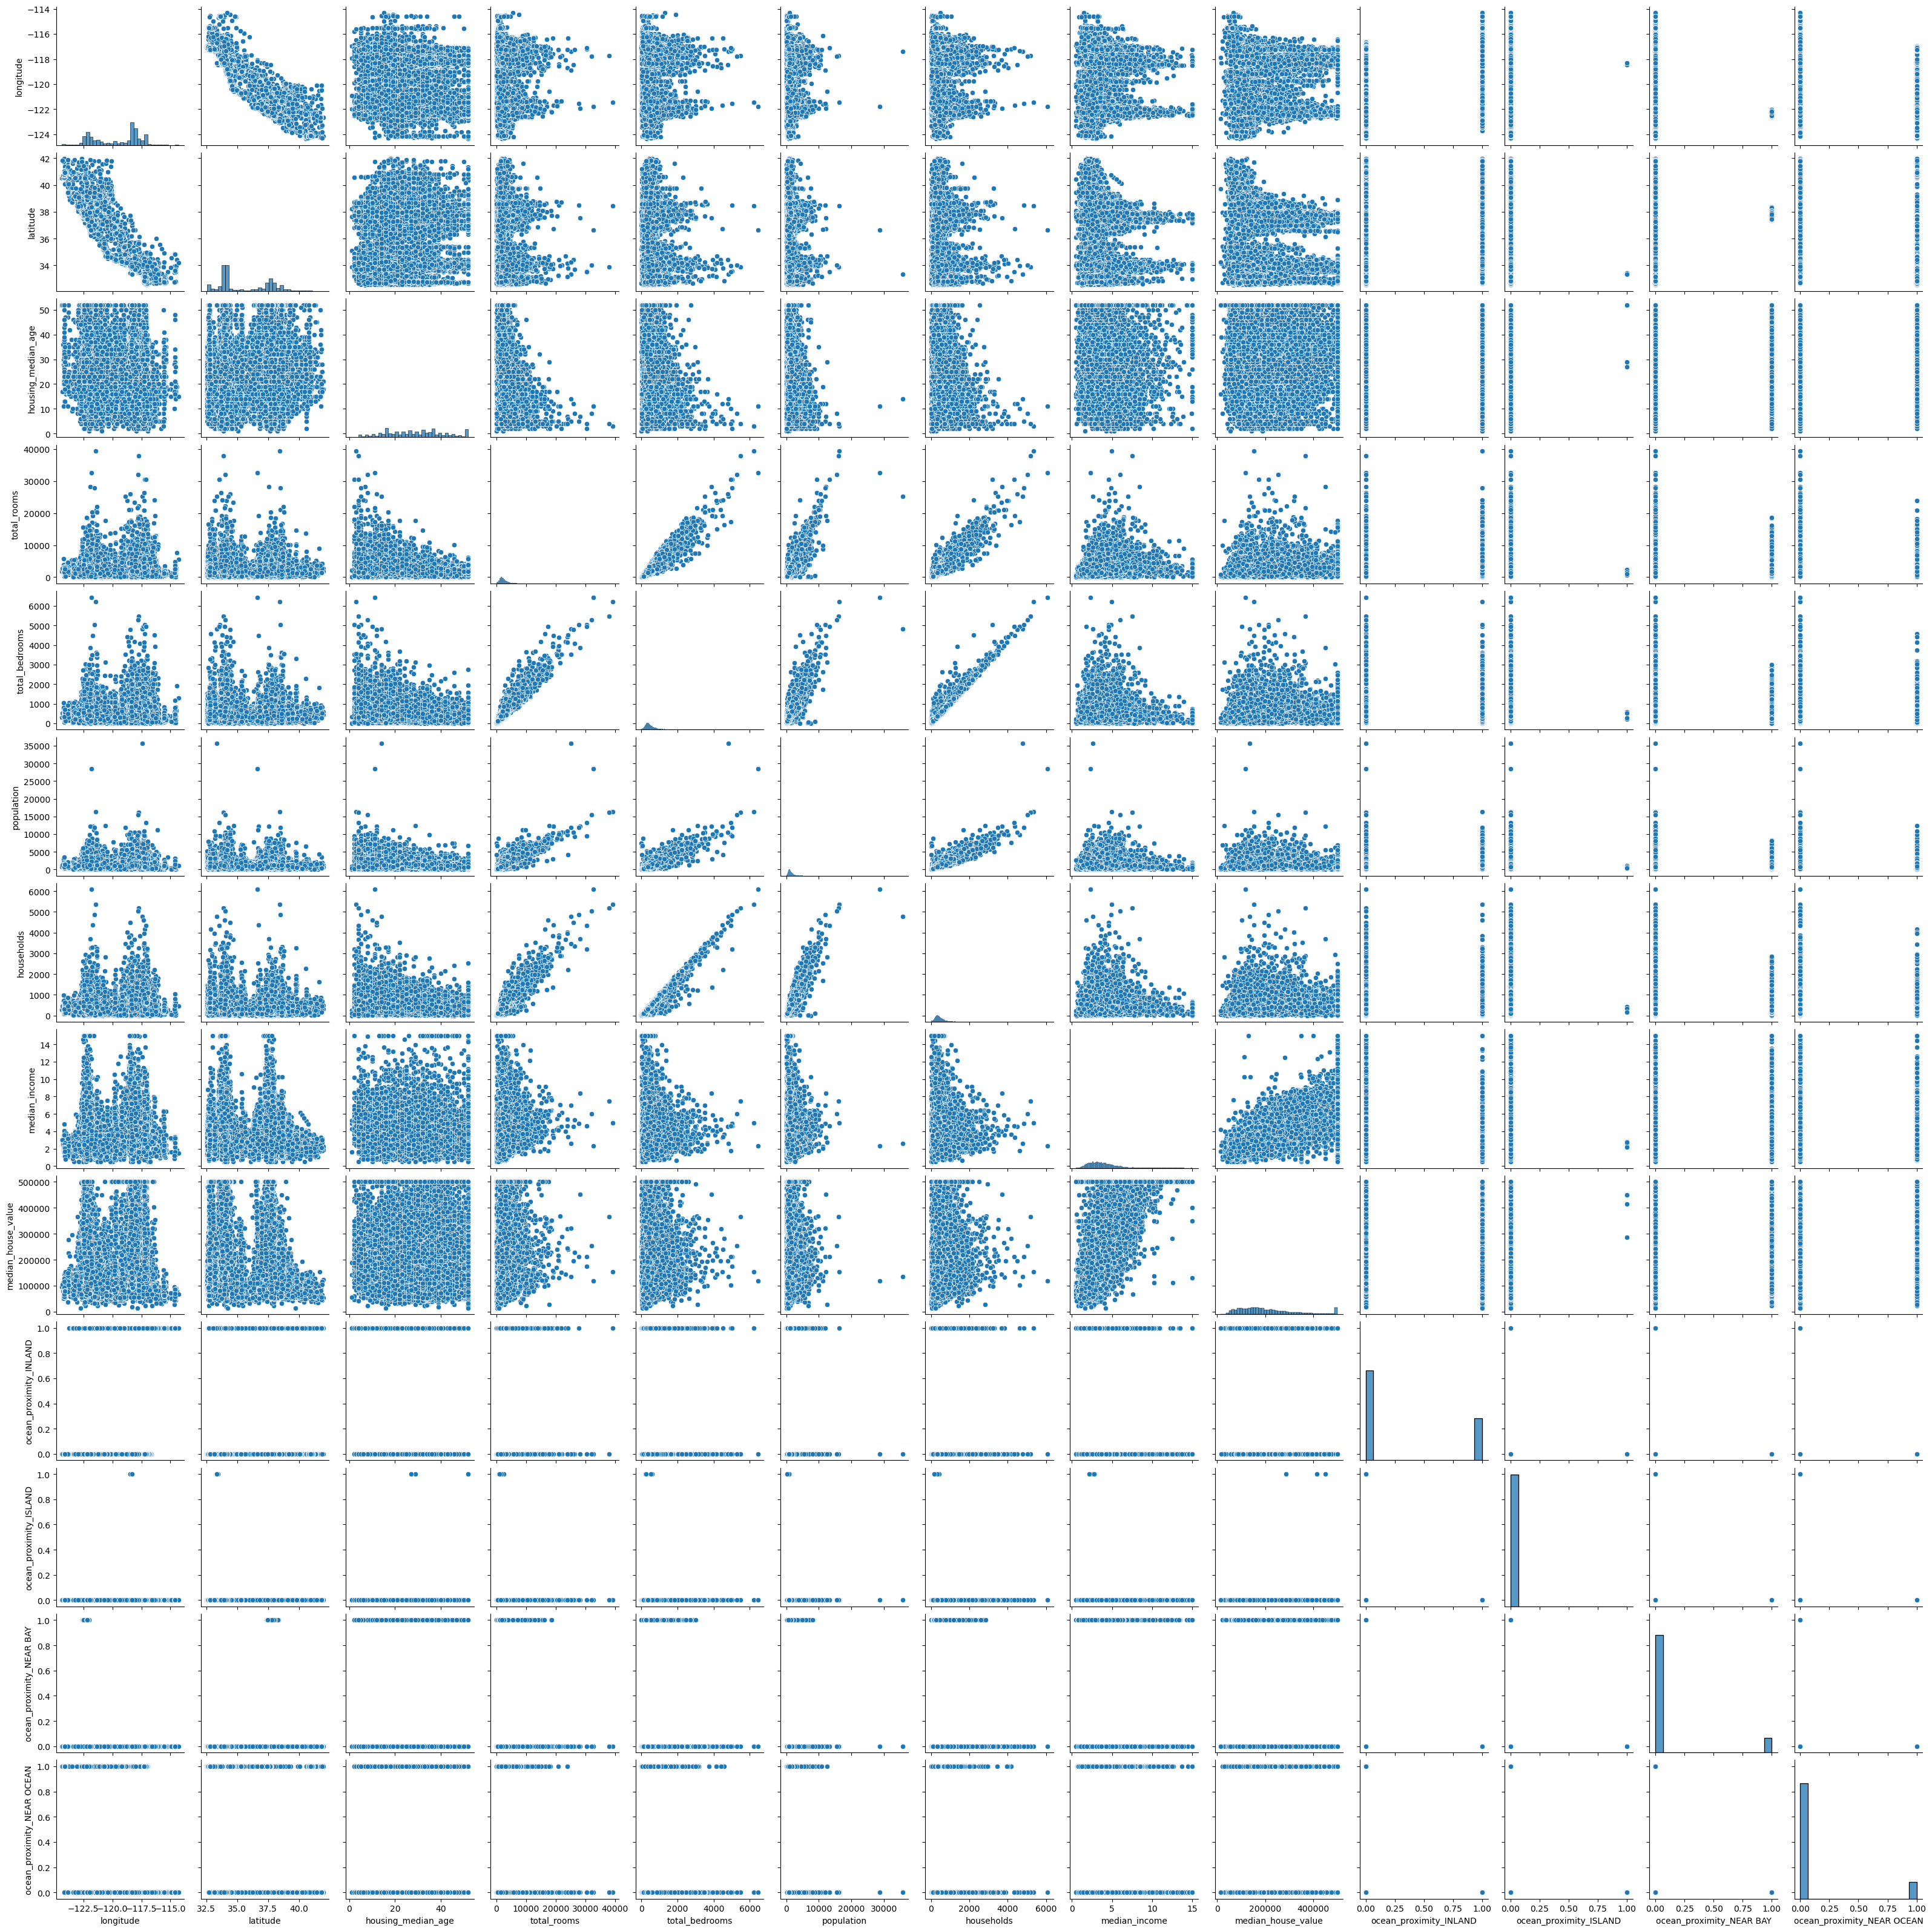

In [39]:
# Show the distribution of all columns
sns.pairplot(df_train)

In [40]:
# Show statistical information of the dataset
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16342.000000,16342.000000,16342.000000,16342.000000,16342.000000,16342.000000,16342.000000,16342.000000,16342.000000
mean,-119.564000,35.626731,28.616571,2624.127830,535.398911,1422.287847,497.264044,3.867453,206427.203953
std,2.001582,2.135542,12.581886,2182.443007,420.001285,1140.915444,380.593989,1.892896,115480.843374
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,2.562500,119400.000000
50%,-118.490000,34.250000,29.000000,2116.000000,432.000000,1164.000000,408.000000,3.535500,179500.000000
75%,-118.010000,37.710000,37.000000,3135.000000,644.750000,1725.750000,603.000000,4.741925,263600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [41]:
# Separate features and labels
y_train = df_train['median_house_value']
X_train = df_train.drop(['median_house_value'], axis=1)

In [42]:
# # MinMax Scaling
# numeric_cols = X_train.select_dtypes(include='number').columns

# scaler_X = MinMaxScaler()

# X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
# pd.DataFrame(y_train, columns=['median_house_value'])

In [43]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16342.000000,16342.000000,16342.000000,16342.000000,16342.000000,16342.000000,16342.000000,16342.000000
mean,-119.564000,35.626731,28.616571,2624.127830,535.398911,1422.287847,497.264044,3.867453
std,2.001582,2.135542,12.581886,2182.443007,420.001285,1140.915444,380.593989,1.892896
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,2.562500
50%,-118.490000,34.250000,29.000000,2116.000000,432.000000,1164.000000,408.000000,3.535500
75%,-118.010000,37.710000,37.000000,3135.000000,644.750000,1725.750000,603.000000,4.741925
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


### 3.2 Testing Data

In [45]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 4128
Number of columns: 10


In [ ]:
# # Drop unnecessary columns
# df_test = df_test.drop(['Unnamed: 0'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [46]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [47]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4091 non-null   float64
 1   latitude            4091 non-null   float64
 2   housing_median_age  4091 non-null   float64
 3   total_rooms         4091 non-null   float64
 4   total_bedrooms      4091 non-null   float64
 5   population          4091 non-null   float64
 6   households          4091 non-null   float64
 7   median_income       4091 non-null   float64
 8   median_house_value  4091 non-null   float64
 9   ocean_proximity     4091 non-null   object 
dtypes: float64(9), object(1)
memory usage: 319.7+ KB


In [ ]:
# # Rename columns
# headers = ["carat", "cut", "color",
#            "clarity", "depth (%)", "table", "price", 
#            "length (mm)", "width (mm)", "depth (mm)"]
# df_test.columns = headers
# df_test.columns

In [ ]:
# # Drop poor features (to avoid overfitting)
# df_test = df_test.drop(['VendorID'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test = df_test.drop(['payment_type'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [ ]:
# # Remove X's invalid row
# df_test = df_test[df_test["Bare Nuclei"] != "?"]

# X = df_test.drop(['Class'], axis=1)

# for col in X.columns:
#     print(X[col].value_counts())

In [ ]:
# # Change the data type of X's invalid columns
# df_test["Bare Nuclei"] = df_test["Bare Nuclei"].astype("int64")
# df_test.info()

In [ ]:
# # Remove y's invalid row
# df_test = df_test[df_test["Bare Nuclei"] != "?"]

# y = df_test['Class']

# for col in X.columns:
#     print(X[col].value_counts())

In [ ]:
# # Change the data type of y's invalid column
# df_test["Bare Nuclei"] = df_test["Bare Nuclei"].astype("int64")
# df_test.info()

In [48]:
# Encode nominal data
df_test = pd.get_dummies(df_test, columns=['ocean_proximity'], drop_first=True)
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.34,37.55,25.0,4470.0,518.0,1507.0,504.0,13.3913,500001.0,False,False,False,True
1,-120.38,37.97,47.0,1060.0,219.0,496.0,205.0,2.5781,104800.0,True,False,False,False
2,-118.36,34.09,36.0,1390.0,458.0,874.0,468.0,2.5812,200000.0,False,False,False,False
3,-117.99,33.81,46.0,38.0,8.0,66.0,14.0,4.1667,162500.0,False,False,False,False
4,-122.57,37.97,47.0,5416.0,1115.0,2177.0,1027.0,3.5055,382100.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,-118.19,34.19,34.0,2061.0,260.0,825.0,254.0,15.0001,500001.0,False,False,False,False
4087,-118.14,33.87,21.0,6618.0,1773.0,4396.0,1649.0,3.0989,171400.0,False,False,False,False
4088,-117.07,33.67,11.0,939.0,187.0,557.0,190.0,2.3750,145800.0,True,False,False,False
4089,-117.61,33.43,24.0,2303.0,399.0,851.0,379.0,3.9875,346500.0,False,False,False,True


In [ ]:
# # Encode ordinal data
# categorical_cols = list(set(df_test.columns.to_list()) - set(df_test._get_numeric_data().columns.to_list()))

# enc_maps = {
#     "cut" : [{'col': "cut", 'mapping': {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}}],
#     "color" : [{'col': "color", 'mapping': {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J": 6}}],
#     "clarity" : [{'col': "clarity", 'mapping': {"FL": 0, "IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "l1": 8, "l2": 9, "l3": 10}}],
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_test = enc.fit_transform(df_test)


# df_test

In [ ]:
# # Drop correlated features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [ ]:
# # Drop unimportant features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [49]:
# Separate features and labels
X_test = df_test.drop(['median_house_value'], axis=1)
y_test = df_test['median_house_value']

In [ ]:
# # MinMax Scaling
# numeric_cols = X_test.select_dtypes(include='number').columns

# scaler_X = MinMaxScaler()

# X_test[numeric_cols] = scaler_X.fit_transform(X_test[numeric_cols])

In [50]:
X_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,-119.597407,35.659147,28.699096,2685.943290,547.743828,1435.569054,508.099487,3.885977
std,2.011556,2.139626,12.632676,2196.096279,426.777061,1101.957119,388.962879,1.924787
min,-124.300000,32.550000,2.000000,15.000000,3.000000,5.000000,3.000000,0.499900
25%,-121.820000,33.940000,18.000000,1473.000000,299.500000,799.500000,282.000000,2.568500
50%,-118.530000,34.280000,29.000000,2165.000000,445.000000,1172.000000,415.000000,3.540200
75%,-118.010000,37.730000,37.000000,3172.500000,655.000000,1713.500000,607.500000,4.755450
max,-114.620000,41.920000,52.000000,30405.000000,5419.000000,15037.000000,4930.000000,15.000100


# 4. Random Forest Regressor

In [51]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Evaluate the model

residual_df = None
resi = None

def evaluate_model(model, y_train, X_test, y_test):    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    global residual_df
    residual_df = pd.DataFrame({'Y_Test': y_test, 'Y_Pred': y_pred, 'Residuals':(y_test-y_pred) }).head(5)
    
    print("Training error:")
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    print("MAE:", mae_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print("MSE:", mse_train)
    rmse_train = math.sqrt(mse_train)
    print("RMSE:", rmse_train)
    r2_train = r2_score(y_train, y_train_pred)
    print("R^2:", r2_train)
    
    print("\nTest error:")
    
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_pred)
    print("R^2:", r2)

evaluate_model(model, y_train, X_test, y_test)

Training error:
MAE: 11797.965720230082
MSE: 335686141.49134254
RMSE: 18321.739586931766
R^2: 0.9748267033069133

Test error:
MAE: 30618.281046198972
MSE: 2179205259.5750074
RMSE: 46681.95860902804
R^2: 0.8359021100653923


In [54]:
residual_df

,Y_Test,Y_Pred,Residuals
0,500001.0,500001.00,0.00
1,104800.0,105861.00,-1061.00
2,200000.0,284990.01,-84990.01
3,162500.0,244967.18,-82467.18
4,382100.0,297146.02,84953.98


# 5. Tuning

In [55]:
base_model = RandomForestRegressor(random_state=42)

params = {
    'n_estimators': [10, 25, 50, 75, 100, 125, 150, 175, 200],
}

grid_search = GridSearchCV(estimator=base_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "r2")

In [56]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
CPU times: total: 20.6 s
Wall time: 1min 18s


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'n_estimators': [10, 25, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [57]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
8,19.112529,0.105628,0.155130,0.003106,200,{'n_estimators': 200},0.813476,0.821945,0.800048,0.807550,0.810755,0.008024,1
7,18.691130,0.198386,0.162552,0.010901,175,{'n_estimators': 175},0.813162,0.821607,0.799970,0.807358,0.810524,0.007925,2
5,13.402313,0.115121,0.123606,0.003361,125,{'n_estimators': 125},0.812974,0.820726,0.799626,0.807922,0.810312,0.007672,3
6,16.054186,0.184086,0.145072,0.000998,150,{'n_estimators': 150},0.812838,0.821181,0.799976,0.807172,0.810292,0.007765,4
4,10.744297,0.173635,0.098254,0.001630,100,{'n_estimators': 100},0.812297,0.820534,0.799379,0.808293,0.810126,0.007614,5


In [58]:
best_params = grid_search.best_estimator_
best_params

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
# Evaluate the best model
evaluate_model(best_params, y_train, X_test, y_test)

Training error:
MAE: 11677.56597968425
MSE: 328398941.2752204
RMSE: 18121.780852753418
R^2: 0.9753731746395915

Test error:
MAE: 30482.25516499633
MSE: 2167298224.5562735
RMSE: 46554.2503382481
R^2: 0.8367987302040261


# 6. Testing Model (if test dataset exists)